## Data Science and Business Analytics Internship
### GRIP December 2022
#### Task - 2 Prediction by Unsupervised Machine Learning
#### Author: Rathankumar Mulukuntla 
#### Problem Statement- From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.# 

## 1. importing the librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Data

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) # See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
iris_df.shape

(150, 4)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<AxesSubplot:>

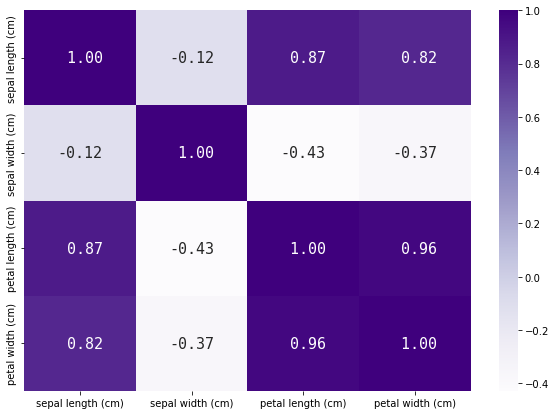

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot=True,annot_kws={"fontsize":15,"fontfamily":"monospace"},fmt=" .2f", cmap = "Purples")

## 3. Determining the Optimum Number Of Clusters Using the ELBOW METHOD

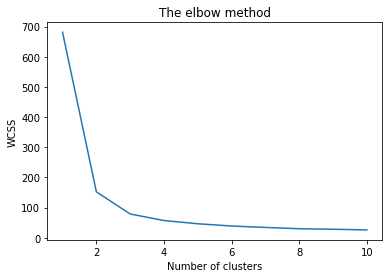

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## 4. Creating the Kmeans Classifier 

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## 5. Plotting the Clusters

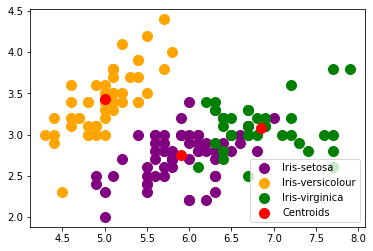

In [10]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

## 3D SCATTERPLOT

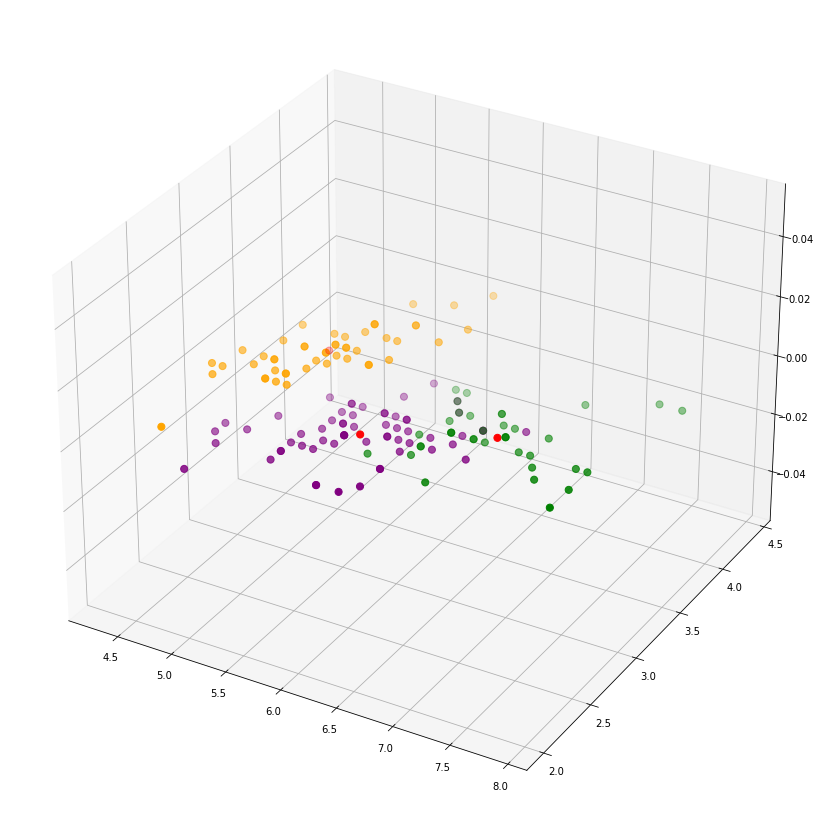

In [11]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.show()

## 6. Labelling the predictions

In [12]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans=='0', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)


## 7. Adding prediction to dataset

In [13]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


# DATA VISUALISATION

## 8. Barplot - Cluster distribution

<AxesSubplot:ylabel='Cluster'>

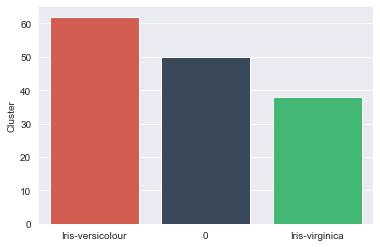

In [14]:
#Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"].unique(),
            y = data_with_clusters["Cluster"].value_counts(),
            palette = sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]))

## Barplot inference

#### There are around 62 iris-versicolour , 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset as predicted

## 8. Violin Plot 

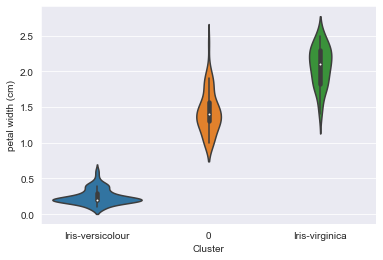

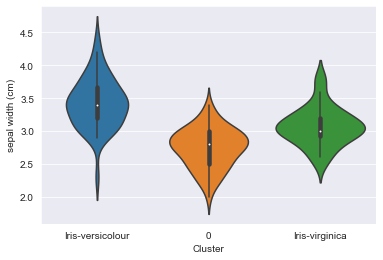

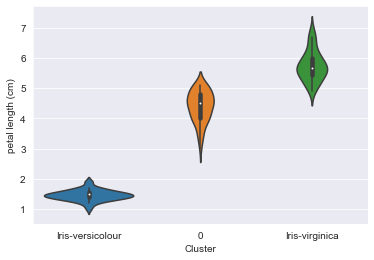

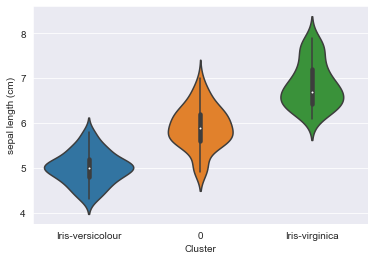

In [15]:
sns.violinplot(x="Cluster",y="petal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="petal length (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal length (cm)",data=data_with_clusters)
plt.show()

##  9. Pair Plot

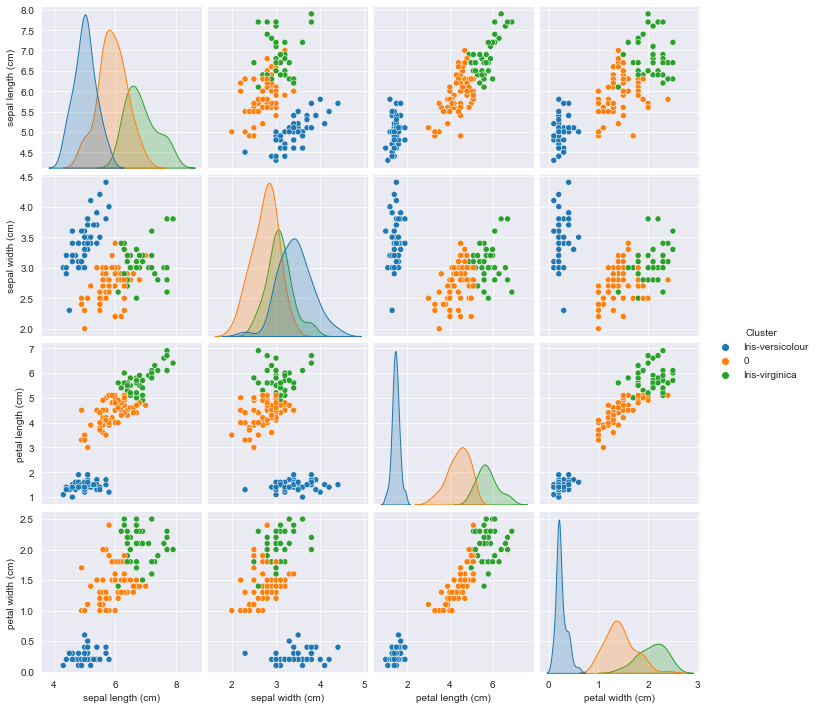

In [16]:
sns.set_style('darkgrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');